In [236]:
import os
import sys
import random

import cv2
import numpy as np
import pandas as pd
import h5py

import keras
from keras import models
from keras.preprocessing.image import array_to_img, img_to_array, load_img
from keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn

from train import plot_history

In [237]:
class_names = {0: 'alien',
                 1: 'devil',
                 2: 'ghost',
                 3: 'hearteyes',
                 4: 'lipstick',
                 5: 'octopus',
                 6: 'poop',
                 7: 'robot',
                 8: 'rocket',
                 9: 'unicorn'}

In [238]:
h5_file = './output-aws/tenclasses-augm/simple_cnn_multi_10c_with_aug.h5'
hdf5_file = './output-aws/tenclasses-augm/hdf5/simple_cnn_multi-071-0.163.hdf5'

# h5_file = './output-aws/fiveclasses-augm/simple_cnn_multi_5c_with_aug.h5'
# hdf5_file = './output-aws/fiveclasses-augm/hdf5/simple_cnn_multi-099-0.079.hdf5'

def load_model_and_weights(h5_file, hdf5_file):
    model = models.load_model(h5_file)
    model.load_weights(hdf5_file)
    
    return model

model = load_model_and_weights(h5_file, hdf5_file)

/Users/koshkin/miniconda3/lib/python3.6/site-packages/keras/models.py:288: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [232]:
def classify_image(img_file, model):
    
    class_names = {0: 'alien',
                 1: 'devil',
                 2: 'ghost',
                 3: 'hearteyes',
                 4: 'lipstick',
                 5: 'octopus',
                 6: 'poop',
                 7: 'robot',
                 8: 'rocket',
                 9: 'unicorn'}
    
    img = load_img(img_file, target_size=(320, 240))
    
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = x / 255.
    
    pred_probs = model.predict(x)
    
    fig = plt.figure(figsize=(6,4))
    ax = fig.add_subplot(1, 1, 1, xticks=[], yticks=[])
    ax.imshow(mpimg.imread(img_file))
    
    n = 3
    
    top_n = pred_probs.argsort(axis=1)[0][::-1][:n]
    results = [(class_names.get(i), pred_probs[0][i]) for i in top_n]
    
    for i,r in enumerate(results):
        c_name, c_prob = r
        xy = (10, i*20 + 20)
        ax.annotate('{0}: {1:0.4f}'.format(c_name, c_prob), fontsize=12, xy=xy, color='cyan') 
    
    plt.savefig(f'predicted-{os.path.basename(img_file)}')
                    
    return results

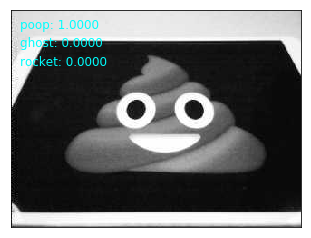

In [239]:
# img_file = './images/all_multiclass/train/hearteyes/hearteyes-10.jpeg'
img_file = pick_random_image()
predicted = classify_image(img_file, model)

In [240]:
def pick_random_image():
    
    class_names = {0: 'alien',
                 1: 'devil',
                 2: 'ghost',
                 3: 'hearteyes',
                 4: 'lipstick',
                 5: 'octopus',
                 6: 'poop',
                 7: 'robot',
                 8: 'rocket',
                 9: 'unicorn'}
    
    label = class_names.get(random.randint(0, 9))
    
    path = os.path.join('./images/originals', label)
    fname = random.choice(os.listdir(path))
    
    return os.path.join(path, fname)

In [127]:
img = load_img(pick_random_image(), target_size=(320, 240))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x / 255.

In [128]:
model.predict_classes(x)

array([9])

In [200]:
pred_probs = model.predict(x)
top_3 = pred_probs.argsort(axis=1)[0][::-1][:3]
top_3
class_names.get(top_3[0])
pred_probs[0][top_3[0]]
# results = [(class_names.get(i), pred_probs[i]) for i in top_3]

1.0

In [174]:
preds = model.predict(x)

In [185]:
top_5 = preds.argsort(axis=1)[0][::-1][:5]
top_5

array([9, 8, 7, 2, 6])

In [90]:
model.predict_proba(x)

array([[2.0594185e-03, 3.3474416e-01, 4.1682851e-02, 1.0763325e-04,
        1.7539127e-02, 2.8980273e-04, 1.2977262e-01, 7.3806936e-04,
        4.4284841e-01, 3.0217888e-02]], dtype=float32)

In [45]:
directory = './images/ten_multiclass/test/'

batch_size = 5

datagen = ImageDataGenerator(rescale=1./255)
generator = datagen.flow_from_directory(
        directory,
#         target_size=(320, 240),
#         batch_size=1,
        class_mode='categorical')

classes_dict = generator.class_indices

Found 1000 images belonging to 10 classes.


In [212]:
o, t = (1, 2)
o

1

In [47]:
{v: k for k, v in labels.items()} 

{0: 'alien',
 1: 'devil',
 2: 'ghost',
 3: 'hearteyes',
 4: 'lipstick',
 5: 'octopus',
 6: 'poop',
 7: 'robot',
 8: 'rocket',
 9: 'unicorn'}

In [121]:
test_dir = './images/ten_multiclass/test/'
test_datagen = ImageDataGenerator(rescale=1. / 255)

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(320, 240),
        batch_size=20,
        class_mode='categorical')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 1000 images belonging to 10 classes.
test acc: 0.9969999992847443


In [123]:
test_generator.class_indices

{'alien': 0,
 'devil': 1,
 'ghost': 2,
 'hearteyes': 3,
 'lipstick': 4,
 'octopus': 5,
 'poop': 6,
 'robot': 7,
 'rocket': 8,
 'unicorn': 9}

In [126]:
model.output[:,3]

<tf.Tensor 'strided_slice_1:0' shape=(?,) dtype=float32>